In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

In [4]:
df = pd.read_csv("train.csv")

In [5]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['hour'] = df['datetime'].dt.hour
df['dayofweek'] = df.datetime.dt.dayofweek
df['day'] = df.datetime.dt.day
df['month'] = df.datetime.dt.month
df['year'] = df.datetime.dt.year
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,dayofweek,day,month,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,5,1,1,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,5,1,1,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,5,1,1,2011
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,5,1,1,2011
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,5,1,1,2011


In [6]:
df.drop('datetime', axis=1, inplace=True);
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,dayofweek,day,month,year
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,5,1,1,2011
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,5,1,1,2011
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,5,1,1,2011
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,5,1,1,2011
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,5,1,1,2011


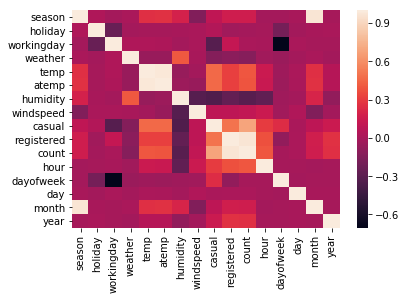

In [7]:
sns.heatmap(df.corr())

In [8]:
linreg = LinearRegression()
lasso = Lasso(random_state=30)
ridge = Ridge(random_state=30)
models_name = ['linreg', 'lasso', 'ridge']
models = [linreg, lasso, ridge]

scaler = StandardScaler()
OHE = OneHotEncoder(sparse=False, handle_unknown='ignore')


In [9]:
def Run(df, models = models, models_name = models_name):
    x, y = df.drop('count', axis=1), df['count']
    x_train, x_valid, y_train, y_valid = train_test_split(x.values, y.values, test_size=0.25, random_state=47)
    results = []
    for model in models:
        model.fit(x_train, y_train)
        results.append([mean_squared_error(y_valid, model.predict(x_valid)),
                        np.sqrt(mean_squared_error(y_valid, model.predict(x_valid)))])

    return pd.DataFrame(np.array(results).T, index = ['mse', 'rmse'], columns = models_name)

In [10]:
Run(df)

,linreg,lasso,ridge
mse,6.257674e-25,0.000441,1.167207e-11
rmse,7.910546e-13,0.021006,3.416441e-06


##### Слишком хороший mse, а все потому, что еще не убраны casual и registered

In [11]:
df_copy = df.copy()
df.drop(['casual', 'registered'], axis=1, inplace=True);
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,dayofweek,day,month,year
0,1,0,0,1,9.84,14.395,81,0.0,16,0,5,1,1,2011
1,1,0,0,1,9.02,13.635,80,0.0,40,1,5,1,1,2011
2,1,0,0,1,9.02,13.635,80,0.0,32,2,5,1,1,2011
3,1,0,0,1,9.84,14.395,75,0.0,13,3,5,1,1,2011
4,1,0,0,1,9.84,14.395,75,0.0,1,4,5,1,1,2011


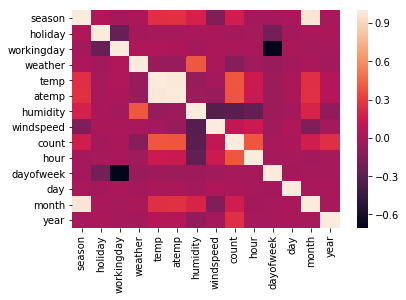

In [12]:
sns.heatmap(df.corr());

In [13]:
Run(df)

,linreg,lasso,ridge
mse,22011.447872,22044.982419,22011.474573
rmse,148.362555,148.475528,148.362645


### Уже больше похоже на правду, используем one hot encoder

In [14]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,dayofweek,day,month,year
0,1,0,0,1,9.84,14.395,81,0.0,16,0,5,1,1,2011
1,1,0,0,1,9.02,13.635,80,0.0,40,1,5,1,1,2011
2,1,0,0,1,9.02,13.635,80,0.0,32,2,5,1,1,2011
3,1,0,0,1,9.84,14.395,75,0.0,13,3,5,1,1,2011
4,1,0,0,1,9.84,14.395,75,0.0,1,4,5,1,1,2011


In [15]:
df_copy.drop(['casual', 'registered'], axis=1, inplace=True)
df_copy.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,dayofweek,day,month,year
0,1,0,0,1,9.84,14.395,81,0.0,16,0,5,1,1,2011
1,1,0,0,1,9.02,13.635,80,0.0,40,1,5,1,1,2011
2,1,0,0,1,9.02,13.635,80,0.0,32,2,5,1,1,2011
3,1,0,0,1,9.84,14.395,75,0.0,13,3,5,1,1,2011
4,1,0,0,1,9.84,14.395,75,0.0,1,4,5,1,1,2011


In [16]:
columns_use = ['weather', 'season', 'holiday', 'workingday', 'hour', 
          'dayofweek', 'day', 'year', 'month']

In [17]:
OHE.fit(df_copy[columns_use])
df_copy = pd.concat([df_copy.drop(columns_use, axis=1), pd.DataFrame(OHE.transform(df_copy[columns_use]))], axis=1).reindex()

In [18]:
df_copy.head()

,temp,atemp,humidity,windspeed,count,0,1,2,3,4,...,66,67,68,69,70,71,72,73,74,75
0,9.84,14.395,81,0.0,16,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9.02,13.635,80,0.0,40,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9.02,13.635,80,0.0,32,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9.84,14.395,75,0.0,13,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.84,14.395,75,0.0,1,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
quant = ['atemp', 'windspeed', 'temp', 'humidity']
s = scaler.fit_transform(df_copy[quant])
df_copy = pd.concat([df_copy.drop(quant, axis=1), pd.DataFrame(scaler.transform(df_copy[quant]), columns = quant)], axis=1).reindex()
df_copy.head()

D:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\Anaconda\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


,count,0,1,2,3,4,5,6,7,8,...,70,71,72,73,74,75,atemp,windspeed,temp,humidity
0,16,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.092737,-1.567754,-1.333661,0.993213
1,40,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.182421,-1.567754,-1.438907,0.941249
2,32,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.182421,-1.567754,-1.438907,0.941249
3,13,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.092737,-1.567754,-1.333661,0.681430
4,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.092737,-1.567754,-1.333661,0.681430


In [20]:
Run(df_copy)

,linreg,lasso,ridge
mse,10226.265864,11170.186354,10209.870338
rmse,101.125001,105.689102,101.043903


#### Узнаем, что можно удалить

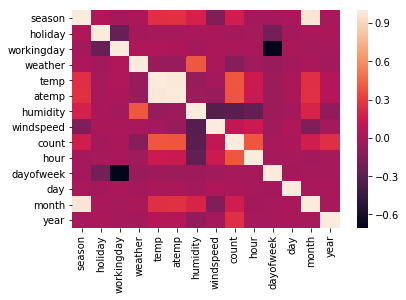

In [21]:
sns.heatmap(df.corr());

In [22]:
use_df = df.copy()

In [23]:
use_df.drop(['atemp', 'season','dayofweek'], axis=1, inplace=True)

In [24]:
columns_use = ['weather', 'holiday', 'workingday', 'hour', 
        'day', 'year', 'month']
OHE.fit(use_df[columns_use])
use_df = pd.concat([use_df.drop(columns_use, axis=1), pd.DataFrame(OHE.transform(use_df[columns_use]))], axis=1).reindex()
use_df.head()

,temp,humidity,windspeed,count,0,1,2,3,4,5,...,55,56,57,58,59,60,61,62,63,64
0,9.84,81,0.0,16,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9.02,80,0.0,40,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9.02,80,0.0,32,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9.84,75,0.0,13,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.84,75,0.0,1,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
quant = ['temp', 'humidity', 'windspeed']
s = scaler.fit_transform(use_df[quant])
use_df = pd.concat([use_df.drop(quant, axis=1), pd.DataFrame(scaler.transform(use_df[quant]), columns = quant)], axis=1).reindex()
use_df.head()

D:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\Anaconda\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


,count,0,1,2,3,4,5,6,7,8,...,58,59,60,61,62,63,64,temp,humidity,windspeed
0,16,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.333661,0.993213,-1.567754
1,40,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.438907,0.941249,-1.567754
2,32,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.438907,0.941249,-1.567754
3,13,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.333661,0.681430,-1.567754
4,1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.333661,0.681430,-1.567754


In [26]:
Run(use_df)

,linreg,lasso,ridge
mse,10246.497032,11219.160798,10251.881114
rmse,101.224982,105.920540,101.251573
